# A Gentle Introduction to Time Series Analyis

This notebook provides an End-to-End Time Series pipeline. 

The pipeline covers basic time series analysis concepts:
- **Time Series Visualization** - Lineplot / Scatterplot
- **Time Series Components** - Trend, Seasonality & Noise
- **Data Wrangling**
    - Resampling
    - Outliers
    - Missing Data Imputation
    - Noise Reduction
- **Time Series Forecasting** - AR + MA + ARIMA
- **Feature Generation using Time Series** - Generate features for your Machine Learning model


All background concepts were covered at the Analytics Vidhya DataHour lecture by Miguel Cacho Soblechero, PhD [NEED TO ADD LINK HERE]

# 0. Requirements

### Download and import packages

In [6]:
# Install and Import Necessary Libraries
!pip install statsmodels
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns


### Download dataset

In [15]:
# Load the AirPassengers Dataset
# AirPassengers = sm.datasets.get_rdataset("AirPassengers").data
air_passengers = pd.read_csv("AirPassengers.csv").rename({'Month': 'date', '#Passengers':'num_passengers'}, axis=1)
air_passengers['date'] = pd.to_datetime(air_passengers['date'])
air_passengers.head()

,date,num_passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


# 1. Time Series Visualization

The evolution of the values with time is usually visualized using either a **lineplot** or a **scatterplot**. 

The **lineplot** creates a "cleaner" view of the evolution of values with time. This is done by connecting every point with the adjacent with a line. However, if your data has missing intervals, it might create misleading visual artifacts.

The **scatterplot** avoids this problem by plotting the raw values with their corresponding timestamp, without establishing relationships between points. However, this makes it harder to interpreted.

In [16]:
# Plotting functions
def plot_lineplot_time_series(data: pd.DataFrame, x: str, y: str):
    
    # Basic plotting
    plt.figure(figsize=(15,5))
    sns.lineplot(data=data, x=x, y=y)

    # Format tick labels
    plt.xticks(rotation=45)

def plot_scatter_time_series(data: pd.DataFrame, x: str, y: str):
    
    # Basic plotting
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=data, x=x, y=y)

    # Format tick labels
    plt.xticks(rotation=45)

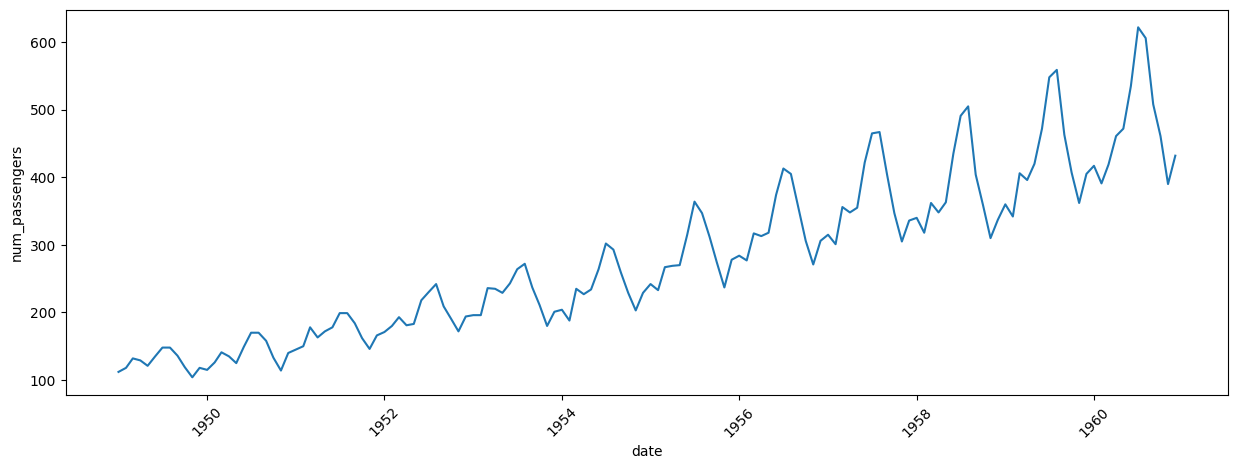

In [17]:
plot_lineplot_time_series(air_passengers, x='date', y='num_passengers')

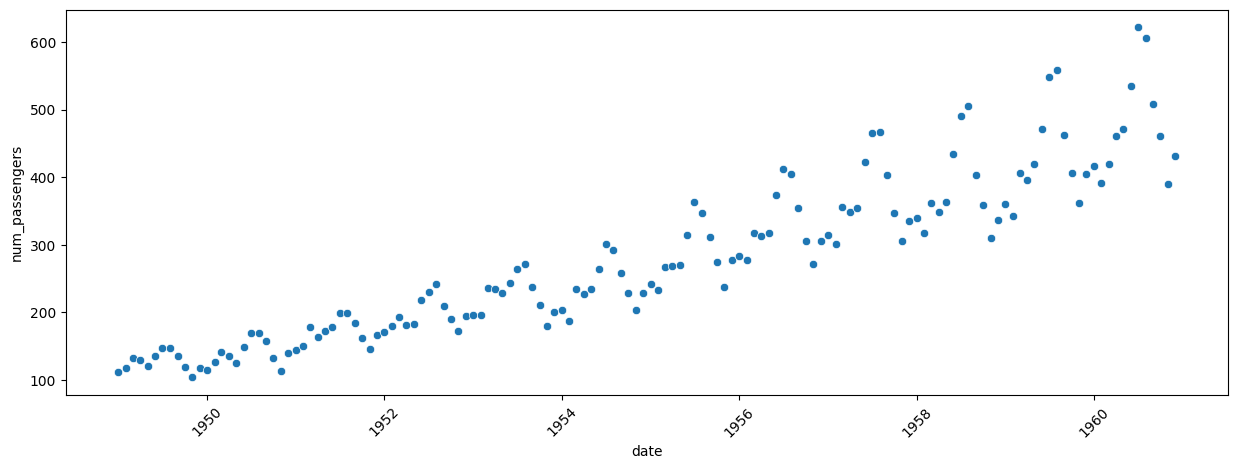

In [18]:
plot_scatter_time_series(air_passengers, x='date', y='num_passengers')

### What happens when we have missing data?

As mentioned before, the lineplot can create misleading visual effects if missing data is present.

In [37]:
available_months = range(0,7)
air_passengers_with_missing_data = air_passengers.loc[air_passengers.date.dt.month.isin(available_months)]

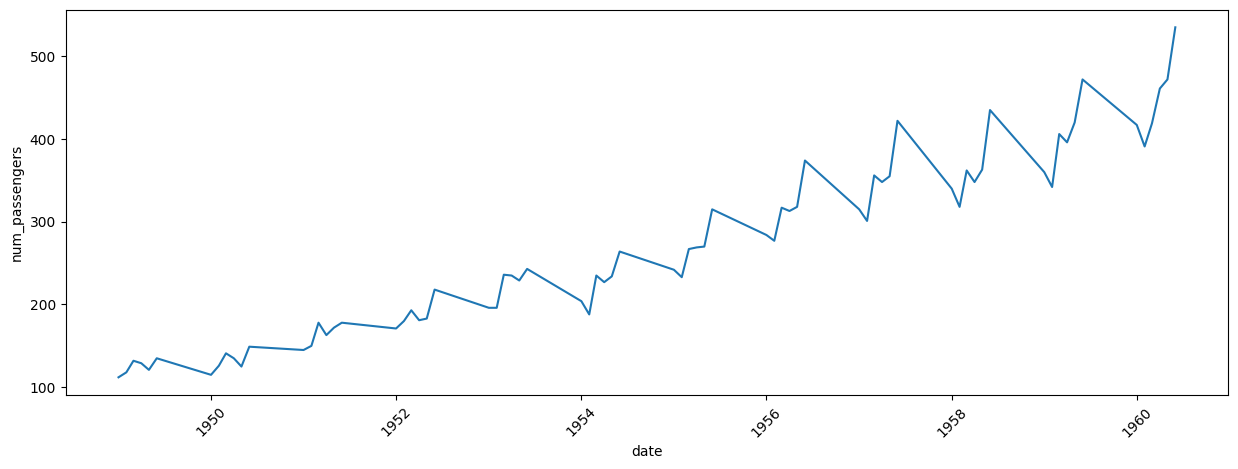

In [38]:
plot_lineplot_time_series(air_passengers_with_missing_data, x='date', y='num_passengers')

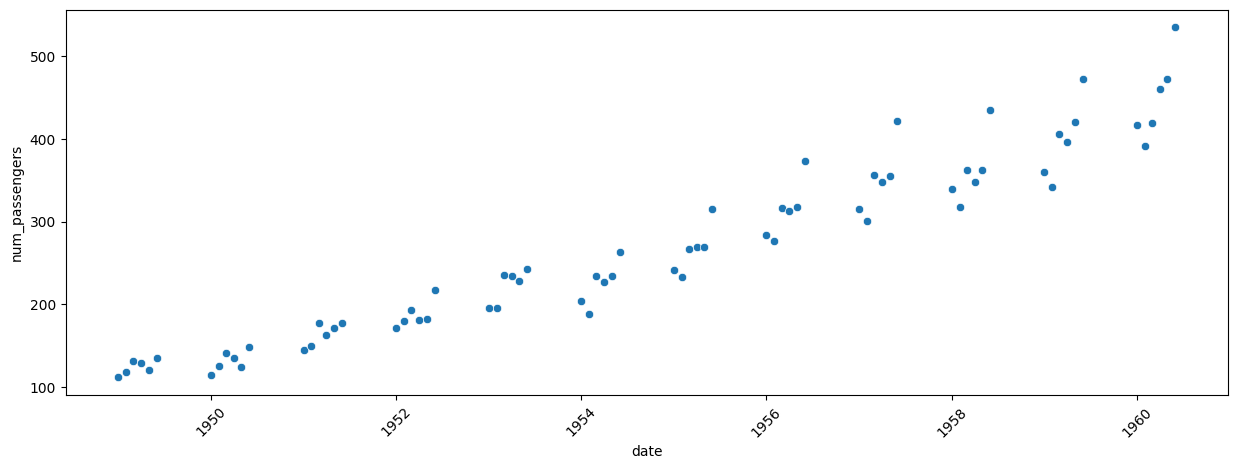

In [39]:
plot_scatter_time_series(air_passengers_with_missing_data, x='date', y='num_passengers')

# 2. Time Series Decomposition

Time Series can be decomposed in:
- Trend
- Seasonality
- Noise

To extract these components, we can leverage libraries such as statsmodels, which does the heavy lifting for us.

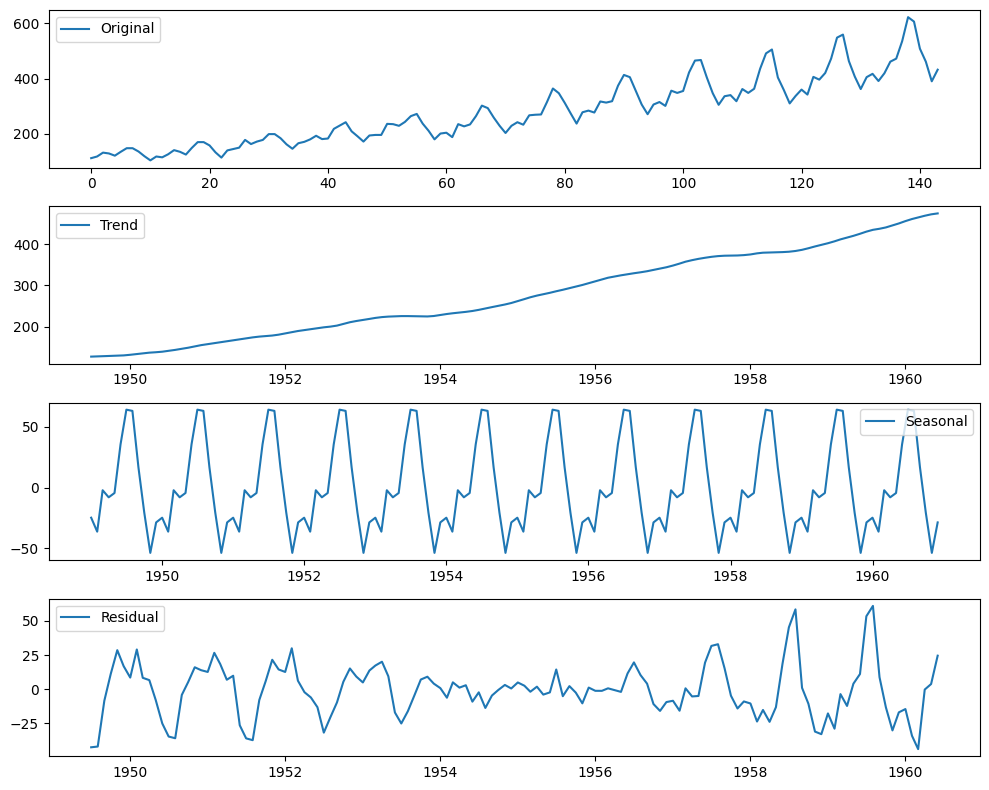

In [42]:
# Decompose the seasonal data
result = seasonal_decompose(air_passengers.set_index('date')['num_passengers'], model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(air_passengers['num_passengers'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

# STATIONARITY TESTS TO BE DONE

# 2. Data Wrangling in Time Series

# 2.1. Resampling

These methods modify the sampling frequency of the time series. 

## 2.1.1. Downsampling
Downsampling reduces the sampling frequency, using a variety of methods:
- Mean: Take the average of a period
- Sum: Accumulate values. This is not suitable for all measurements
- Median: Take the median of a period
- Max: Take the max of a period

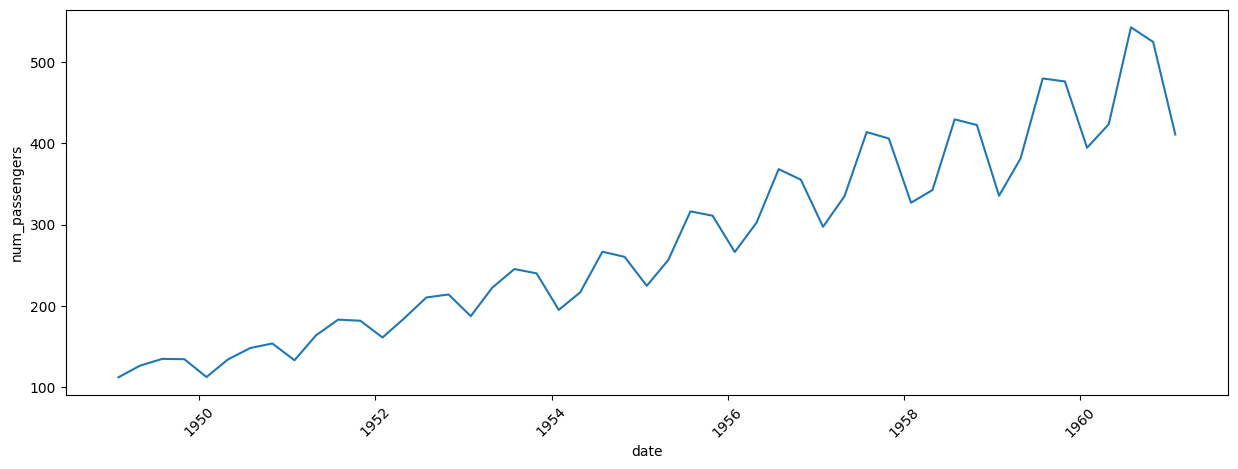

In [43]:
air_passengers_downsampled = air_passengers.set_index("date").resample('3M').mean()  # '3M' stands for 3 months frequency, and mean() computes average
plot_lineplot_time_series(air_passengers_downsampled, "date", "num_passengers")

## 2.1.2. Upsampling
Upsampling creates new samples from the existing ones, using a variety of strategies:
- Imputation using forward-fill: Fill new samples with past values
- Interpolation: Fill new samples with the interpolated values between the two samples.